<a href="https://colab.research.google.com/github/iwatsuki-yuuki/college/blob/main/%E6%83%85%E5%A0%B1%E3%82%B7%E3%82%B9%E3%83%86%E3%83%A0%E5%B7%A5%E5%AD%A6%E6%BC%94%E7%BF%92%EF%BC%88%E3%83%87%E3%83%BC%E3%82%BF%E8%A7%A3%E6%9E%90%E5%85%A5%E9%96%80%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 情報システム工学演習I

## 例題 ex01
- 例題1. データの可視化と分析
- 例題2. 時系列データ予測



### 例題1.  データの可視化と分析

#### (1-1) データのインポート

- AirPassengers (飛行機乗客数）を使用。
- data_AirPassengers.csvをアップロードしてから以下を実行。

In [ ]:
# テスト
import pandas as pd # pandas のimport
fn='./data_AirPassengers.csv' # ファイル名を指定
# fn='https://www.dm.sanken.osaka-u.ac.jp/~yasuko/EX/data_AirPassengers.csv' # URLから直接ダウンロードする場合
index_col = 'Month' # インデックスを指定
df = pd.read_csv(fn, index_col=index_col, parse_dates=True)
df.head() # 可視化 (table)


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#### (1-2) データの可視化

<Axes: xlabel='Month'>

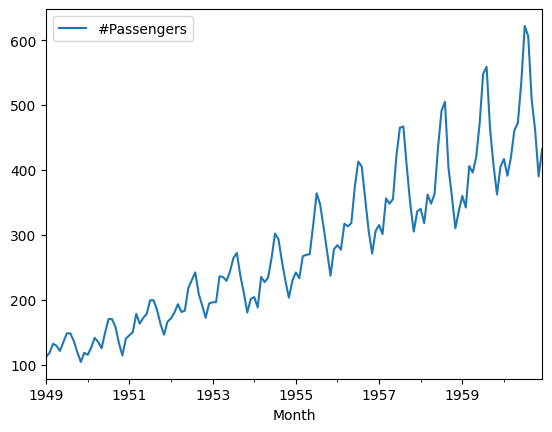

In [ ]:
df.plot() #可視化 (figure)

#### (1-3) データの分析

データについて分析してみる
- 右肩上がりの傾向 (long-term growing trend)
- 周期性あり（yearly periodicity)


### 例題2. 時系列モデルを使った将来予測

#### (2-1) 時系列モデル (AutoRegressive model) を用いた将来予測

- 時系列解析ツールのインポート（色々なツールが存在します。例えば、以下のものを使ってみます。）
- 学習データ、予測データの作成



In [3]:
# https://www.statsmodels.org/stable/tsa.html
!pip install statsmodels


In [ ]:
# 準備：各種インポート
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.ar_model import AutoReg



Y_org: (144, 1)


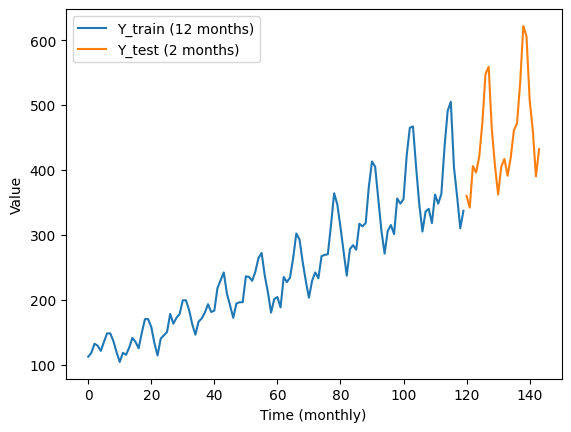

In [ ]:
# 学習データ、予測データの作成
Y_org = df.to_numpy(); print(f'Y_org: {Y_org.shape}')
# 学習幅：10ヶ月、予測幅：2ヶ月
n_a = 0; n_b = 12*10; n_c = n_b + 12*2  # time points a,b,c
# 学習データ、テストデータを作る
Y_train = Y_org[n_a:n_b] # train data
Y_test  = Y_org[n_b:n_c] # test data
# オリジナルデータの可視化
plt.figure()
plt.plot(np.arange(n_a,n_b), Y_train, label='Y_train (12 months)')
plt.plot(np.arange(n_b,n_c), Y_test,  label='Y_test (2 months)')
plt.xlabel('Time (monthly)'); plt.ylabel('Value')
plt.legend()

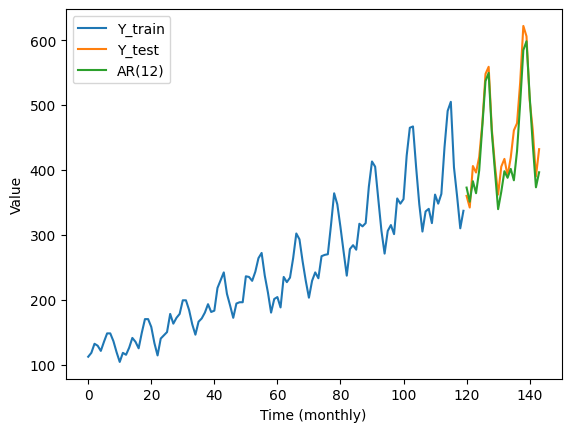

In [ ]:
# AutoRegressive model を用いた時系列モデル学習と将来予測
lag_ar  =  12 # ARのパラメータ数 (lag) を設定, i.e.,  AR(12)
ar      = AutoReg(Y_train, lags = 12)
res     = ar.fit()
Y_pred = ar.predict(res.params, start=n_b, end=n_c-1)
# オリジナルデータと予測結果の可視化
plt.figure()
plt.plot(np.arange(n_a,n_b), Y_train, label='Y_train')
plt.plot(np.arange(n_b,n_c), Y_test,  label='Y_test')
plt.plot(np.arange(n_b,n_c), Y_pred,  label=f'AR({lag_ar})')
plt.xlabel('Time (monthly)'); plt.ylabel('Value')
plt.legend()

#### (2-2) 予測精度の計算 (RMSE, MAE)

In [ ]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
# 予測誤差を計算する関数
def my_accuracy(y_true, y_pred):
  accuracy = {
            "RMSE":   root_mean_squared_error(y_true,  y_pred),
            "MAE":    mean_absolute_error(y_true, y_pred)
            }
  return accuracy
# 予測誤差を表示
print(f'Forecasting error: {my_accuracy(Y_test, Y_pred)}')

Forecasting error: {'RMSE': 27.073354066148053, 'MAE': 21.452090862958613}
